#                              Prediction of default payment credit card

## I. Business understanding:



<h3 style="color:green">Problem Definition </h3>

 The incidence of the recent financial crisis has shown that the general public is not familiar with the elementary financial concepts to make proper financial decisions. In order to understand the relationship between customer income and financial failures, the minimum monthly credit card payment of individuals should be studied deeply. 

Hence, in this paper, we investigate the failing to pay the minimum credit card balance which is a transaction to be regularly carried out every month. In order to increase consumer finance confidence, avoiding delinquency is a big challenge for cardholders and banks as well. 

In a well-established financial system, risk estimation is more important than crisis management.
The significant reason for hazard expectation is to utilize money-related data, for example, business financial statements, client transaction and reimbursement records, etc. To predict business execution or individual clients' credit chance, and to lessen the harm and instability. 
 
In order to prevent these financial complications including decisions that are easier and more frequent in the unintentional failure for paying monthly credit card balances, we proposed a data mining-based failure prevention system from the view of risk management.


<h3 style="color:green">Objective </h3>

The project is being prepared to understand whether the credit card customer will make a payment default in the next month or not based on a number of features.


## II. Data understanding



We used an anonymized dataset of Taiwanese credit card holders from October  2006 (Chou, 2006). This dataset was made available to the public and posted on the UC Irvine Machine Learning Repository website.


The Dataset and its attributes are described below :

1. ID: ID of each client 
2. LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit
3. SEX: Gender (1=male, 2=female)
4. EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
5. MARRIAGE: Marital status (1=married, 2=single,3=divorced, 0=other)
6. AGE: Age in years
7. PAY_0: Repayment status in September, 2005 (-2=no consumption ,0=the use of revolving credit ,-1=pay duly, 1=payment delay for one month, 2=payment delay for two months,8=payment delay for eight months)
8. PAY_2: Repayment status in August, 2005 (scale same as above)
9. PAY_3: Repayment status in July, 2005 (scale same as above)
10. PAY_4: Repayment status in June, 2005 (scale same as above)
11. PAY_5: Repayment status in May, 2005 (scale same as above)
12. PAY_6: Repayment status in April, 2005 (scale same as above)
13. BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)
14. BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)
15. BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)
16. BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)
17. BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)
18. BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)
19. PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)
20. PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)
21. PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)
22. PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)
23. PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)
24. PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)
25. default.payment.next.month: Default payment (1=yes, 0=no)

##### Importing Libraries

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import train_test_split, GridSearchCV, HalvingGridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifiernnn
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, r2_score, roc_auc_score, roc_curve, confusion_matrix, plot_confusion_matrix
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, IsolationForest
from catboost import CatBoostClassifier, cv, Pool
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB


%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("default_of_credit_card_clients.csv")
df.head() 

ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0   1      20000    2          2         1   24      2      2     -1     -1   
1   2     120000    2          2         2   26     -1      2      0      0   
2   3      90000    2          2         2   34      0      0      0      0   
3   4      50000    2          2         1   37      0      0      0      0   
4   5      50000    1          2         1   57     -1      0     -1      0   

   ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0  ...          0          0          0         0       689         0   
1  ...       3272       3455       3261         0      1000      1000   
2  ...      14331      14948      15549      1518      1500      1000   
3  ...      28314      28959      29547      2000      2019      1200   
4  ...      20940      19146      19131      2000     36681     10000   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  default payment next month  
0         0         0         0                           1  
1      1000         0      2000                           1  
2      1000      1000      5000                           0  
3      1100      1069      1000                           0  
4      9000       689       679                           0  

[5 rows x 25 columns]

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [4]:
df.shape

(30000, 25)

In [5]:
df.describe()

ID       LIMIT_BAL           SEX     EDUCATION      MARRIAGE  \
count  30000.000000    30000.000000  30000.000000  30000.000000  30000.000000   
mean   15000.500000   167484.322667      1.603733      1.853133      1.551867   
std     8660.398374   129747.661567      0.489129      0.790349      0.521970   
min        1.000000    10000.000000      1.000000      0.000000      0.000000   
25%     7500.750000    50000.000000      1.000000      1.000000      1.000000   
50%    15000.500000   140000.000000      2.000000      2.000000      2.000000   
75%    22500.250000   240000.000000      2.000000      2.000000      2.000000   
max    30000.000000  1000000.000000      2.000000      6.000000      3.000000   

                AGE         PAY_0         PAY_2         PAY_3         PAY_4  \
count  30000.000000  30000.000000  30000.000000  30000.000000  30000.000000   
mean      35.485500     -0.016700     -0.133767     -0.166200     -0.220667   
std        9.217904      1.123802      1.197186      1.196868      1.169139   
min       21.000000     -2.000000     -2.000000     -2.000000     -2.000000   
25%       28.000000     -1.000000     -1.000000     -1.000000     -1.000000   
50%       34.000000      0.000000      0.000000      0.000000      0.000000   
75%       41.000000      0.000000      0.000000      0.000000      0.000000   
max       79.000000      8.000000      8.000000      8.000000      8.000000   

       ...      BILL_AMT4      BILL_AMT5      BILL_AMT6       PAY_AMT1  \
count  ...   30000.000000   30000.000000   30000.000000   30000.000000   
mean   ...   43262.948967   40311.400967   38871.760400    5663.580500   
std    ...   64332.856134   60797.155770   59554.107537   16563.280354   
min    ... -170000.000000  -81334.000000 -339603.000000       0.000000   
25%    ...    2326.750000    1763.000000    1256.000000    1000.000000   
50%    ...   19052.000000   18104.500000   17071.000000    2100.000000   
75%    ...   54506.000000   50190.500000   49198.250000    5006.000000   
max    ...  891586.000000  927171.000000  961664.000000  873552.000000   

           PAY_AMT2      PAY_AMT3       PAY_AMT4       PAY_AMT5  \
count  3.000000e+04   30000.00000   30000.000000   30000.000000   
mean   5.921163e+03    5225.68150    4826.076867    4799.387633   
std    2.304087e+04   17606.96147   15666.159744   15278.305679   
min    0.000000e+00       0.00000       0.000000       0.000000   
25%    8.330000e+02     390.00000     296.000000     252.500000   
50%    2.009000e+03    1800.00000    1500.000000    1500.000000   
75%    5.000000e+03    4505.00000    4013.250000    4031.500000   
max    1.684259e+06  896040.00000  621000.000000  426529.000000   

            PAY_AMT6  default payment next month  
count   30000.000000                30000.000000  
mean     5215.502567                    0.221200  
std     17777.465775                    0.415062  
min         0.000000                    0.000000  
25%       117.750000                    0.000000  
50%      1500.000000                    0.000000  
75%      4000.000000                    0.000000  
max    528666.000000                    1.000000  

[8 rows x 25 columns]

<AxesSubplot:>

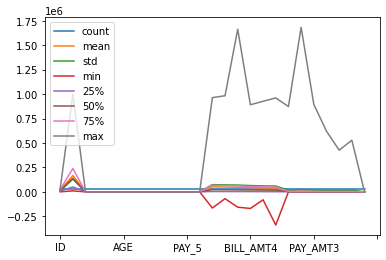

In [6]:
pd.set_option('display.width', 100)
pd.set_option('precision', 8)
df.describe().T.plot()

In [7]:
df['SEX'].value_counts()

2    18112
1    11888
Name: SEX, dtype: int64

In [8]:
df['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

In [9]:
df['MARRIAGE'].value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

There are **30000** distinct credit card clients.

The average value for the amount of credit card limit is **167484.322**. 

The standard deviation is unusually large, max value being **1000000.0**

Education Level is mostly **graduate school** and **university**.

Most of the clients are either **married** or **single** .

As the value 0 for default payment means 'not default' and value 1 means 'default', the mean of **0.22** means that there are **22.1%** of credit card contracts that will default next month (will verify this in the next sections of this analysis).

## III. Data preparation 



Our data samples are **IID (independent and identically distributed)** then we can remove the sample **ID**

In [10]:
df.drop(["ID"], axis=1, inplace=True)

In [11]:
df

LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  PAY_5  ...  \
0          20000    2          2         1   24      2      2     -1     -1     -2  ...   
1         120000    2          2         2   26     -1      2      0      0      0  ...   
2          90000    2          2         2   34      0      0      0      0      0  ...   
3          50000    2          2         1   37      0      0      0      0      0  ...   
4          50000    1          2         1   57     -1      0     -1      0      0  ...   
...          ...  ...        ...       ...  ...    ...    ...    ...    ...    ...  ...   
29995     220000    1          3         1   39      0      0      0      0      0  ...   
29996     150000    1          3         2   43     -1     -1     -1     -1      0  ...   
29997      30000    1          2         2   37      4      3      2     -1      0  ...   
29998      80000    1          3         1   41      1     -1      0      0      0  ...   
29999      50000    1          2         1   46      0      0      0      0      0  ...   

       BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  \
0              0          0          0         0       689         0         0         0   
1           3272       3455       3261         0      1000      1000      1000         0   
2          14331      14948      15549      1518      1500      1000      1000      1000   
3          28314      28959      29547      2000      2019      1200      1100      1069   
4          20940      19146      19131      2000     36681     10000      9000       689   
...          ...        ...        ...       ...       ...       ...       ...       ...   
29995      88004      31237      15980      8500     20000      5003      3047      5000   
29996       8979       5190          0      1837      3526      8998       129         0   
29997      20878      20582      19357         0         0     22000      4200      2000   
29998      52774      11855      48944     85900      3409      1178      1926     52964   
29999      36535      32428      15313      2078      1800      1430      1000      1000   

       PAY_AMT6  default payment next month  
0             0                           1  
1          2000                           1  
2          5000                           0  
3          1000                           0  
4           679                           0  
...         ...                         ...  
29995      1000                           0  
29996         0                           0  
29997      3100                           1  
29998      1804                           1  
29999      1000                           1  

[30000 rows x 24 columns]

<h5 style="color:green"> Check for Null values </h5>

In [12]:
df.isnull().sum()

LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

<h5 style="color:green"> Check for NaN values </h5>

In [13]:
df.isna().sum()

LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

<h5 style="color:green"> Check for duplicated values </h5>

In [14]:
df.duplicated().sum()

35

<h3 style="color:green"> Data Preprocessing </h3>

<h4 style="color:Blue"> Data Transformation </h4>

**Change columns names:**


In data analysis, we may work on a dataset that has no column names or column names containing some unwanted characters, or maybe we just want to rename columns to have better names. 


In our case we chose to change the name of the last column **“default payment next month”** into **“DEF_DAY”** and **“Pay_0”** into **“Pay_1”**


In [15]:
df = df.rename(columns={'default payment next month': 'def_pay', 
                        'PAY_0': 'PAY_1'})
df.head()

LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_1  PAY_2  PAY_3  PAY_4  PAY_5  ...  BILL_AMT4  \
0      20000    2          2         1   24      2      2     -1     -1     -2  ...          0   
1     120000    2          2         2   26     -1      2      0      0      0  ...       3272   
2      90000    2          2         2   34      0      0      0      0      0  ...      14331   
3      50000    2          2         1   37      0      0      0      0      0  ...      28314   
4      50000    1          2         1   57     -1      0     -1      0      0  ...      20940   

   BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  def_pay  
0          0          0         0       689         0         0         0         0        1  
1       3455       3261         0      1000      1000      1000         0      2000        1  
2      14948      15549      1518      1500      1000      1000      1000      5000        0  
3      28959      29547      2000      2019      1200      1100      1069      1000        0  
4      19146      19131      2000     36681     10000      9000       689       679        0  

[5 rows x 24 columns]

As we know, the values 0, 4, 5 and 6 in the column Education are all under the same category "Other". Instead of 4 values signifying one category, we choose one of those 4 values to be the one that represents the "Other" category. We chose the value 4 as a representative and we changed the others (0, 5 and 6) to it.

In [16]:
other_values = (df.EDUCATION != 1) & (df.EDUCATION != 2) & (df.EDUCATION != 3) & (df.EDUCATION != 4)
df.loc[other_values, 'EDUCATION'] = 4

Then, In order to better understand and visualize the data, we need to create two data frames that contains **categorical data** (df_copy_1) and **numerical data** (df_copy1_cat).


In [17]:
## In order to not lose the data or damage it if we want to revisit the old ones, we create a copy of the dataset to work on
df_copy_1 = df.copy()
df_copy1_cat = df.copy()

In [18]:
df_copy1_cat.loc[(df_copy1_cat.EDUCATION == 1), 'EDUCATION'] = 'Graduate School'
df_copy1_cat.loc[(df_copy1_cat.EDUCATION == 2), 'EDUCATION'] = 'University'
df_copy1_cat.loc[(df_copy1_cat.EDUCATION == 3), 'EDUCATION'] = 'High School'
df_copy1_cat.loc[(df_copy1_cat.EDUCATION == 4), 'EDUCATION'] = 'Other'

In [19]:
df_copy1_cat.loc[(df_copy1_cat.SEX == 1), 'SEX'] = 'M'
df_copy1_cat.loc[(df_copy1_cat.SEX == 2), 'SEX'] = 'F'

In [20]:
##Marriage
df_copy1_cat.loc[(df_copy1_cat.MARRIAGE == 0), 'MARRIAGE'] = 'Other'
df_copy1_cat.loc[(df_copy1_cat.MARRIAGE == 1), 'MARRIAGE'] = 'Married'
df_copy1_cat.loc[(df_copy1_cat.MARRIAGE == 2), 'MARRIAGE'] = 'Single'
df_copy1_cat.loc[(df_copy1_cat.MARRIAGE == 3), 'MARRIAGE'] = 'Divorce'

In [21]:
df_copy1_cat

LIMIT_BAL SEX    EDUCATION MARRIAGE  AGE  PAY_1  PAY_2  PAY_3  PAY_4  PAY_5  ...  \
0          20000   F   University  Married   24      2      2     -1     -1     -2  ...   
1         120000   F   University   Single   26     -1      2      0      0      0  ...   
2          90000   F   University   Single   34      0      0      0      0      0  ...   
3          50000   F   University  Married   37      0      0      0      0      0  ...   
4          50000   M   University  Married   57     -1      0     -1      0      0  ...   
...          ...  ..          ...      ...  ...    ...    ...    ...    ...    ...  ...   
29995     220000   M  High School  Married   39      0      0      0      0      0  ...   
29996     150000   M  High School   Single   43     -1     -1     -1     -1      0  ...   
29997      30000   M   University   Single   37      4      3      2     -1      0  ...   
29998      80000   M  High School  Married   41      1     -1      0      0      0  ...   
29999      50000   M   University  Married   46      0      0      0      0      0  ...   

       BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  \
0              0          0          0         0       689         0         0         0   
1           3272       3455       3261         0      1000      1000      1000         0   
2          14331      14948      15549      1518      1500      1000      1000      1000   
3          28314      28959      29547      2000      2019      1200      1100      1069   
4          20940      19146      19131      2000     36681     10000      9000       689   
...          ...        ...        ...       ...       ...       ...       ...       ...   
29995      88004      31237      15980      8500     20000      5003      3047      5000   
29996       8979       5190          0      1837      3526      8998       129         0   
29997      20878      20582      19357         0         0     22000      4200      2000   
29998      52774      11855      48944     85900      3409      1178      1926     52964   
29999      36535      32428      15313      2078      1800      1430      1000      1000   

       PAY_AMT6  def_pay  
0             0        1  
1          2000        1  
2          5000        0  
3          1000        0  
4           679        0  
...         ...      ...  
29995      1000        0  
29996         0        0  
29997      3100        1  
29998      1804        1  
29999      1000        1  

[30000 rows x 24 columns]

After reformatting the data we can start visualizing our new data frame. 


<h4 style="color:Blue"> Data Cleaning and Visualisation </h4>

First, we need to remove the duplicate values : 


In [22]:
print(df_copy_1.duplicated().sum())
print(df_copy1_cat.duplicated().sum())
df_copy_1.drop_duplicates(inplace=True)
df_copy1_cat.drop_duplicates(inplace=True)

35
35


Then, let’s check the correlation between **“Age”** and each category of **“Default”**


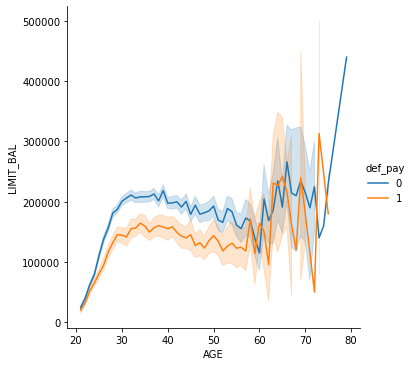

In [23]:
sns.relplot(x="AGE", y="LIMIT_BAL", hue="def_pay", kind="line", data=df_copy1_cat)

From this plot, we can see that for those individuals aged between **21 and ~26**, their credit is practically the same so that might create confusion in our future models to choose whether **He/She will pay next month or not**.

To enhance the performance of our future models and escape from the possibility of it choosing the prediction **randomly** we are going to keep those individuals who are **26 years old or older**.


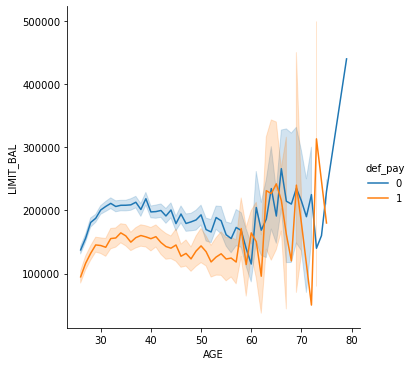

In [24]:
sns.relplot(x="AGE", y="LIMIT_BAL", hue="def_pay", kind="line", data=df_copy1_cat.loc[df_copy1_cat.AGE >= 26])

In [25]:
df_copy1_cat.shape

(29965, 24)

In [26]:
df_copy1_age = df_copy_1.loc[df_copy_1.AGE >= 26].copy()
df_copy1_age_cat = df_copy1_cat.loc[df_copy_1.AGE >= 26].copy()

In [27]:
#Check the number of rows left
df_copy1_age.shape

(26097, 24)

Using the correlation matrix, even after changing the data frame, we can notice that we still have nearly the same correlations.


<AxesSubplot:>

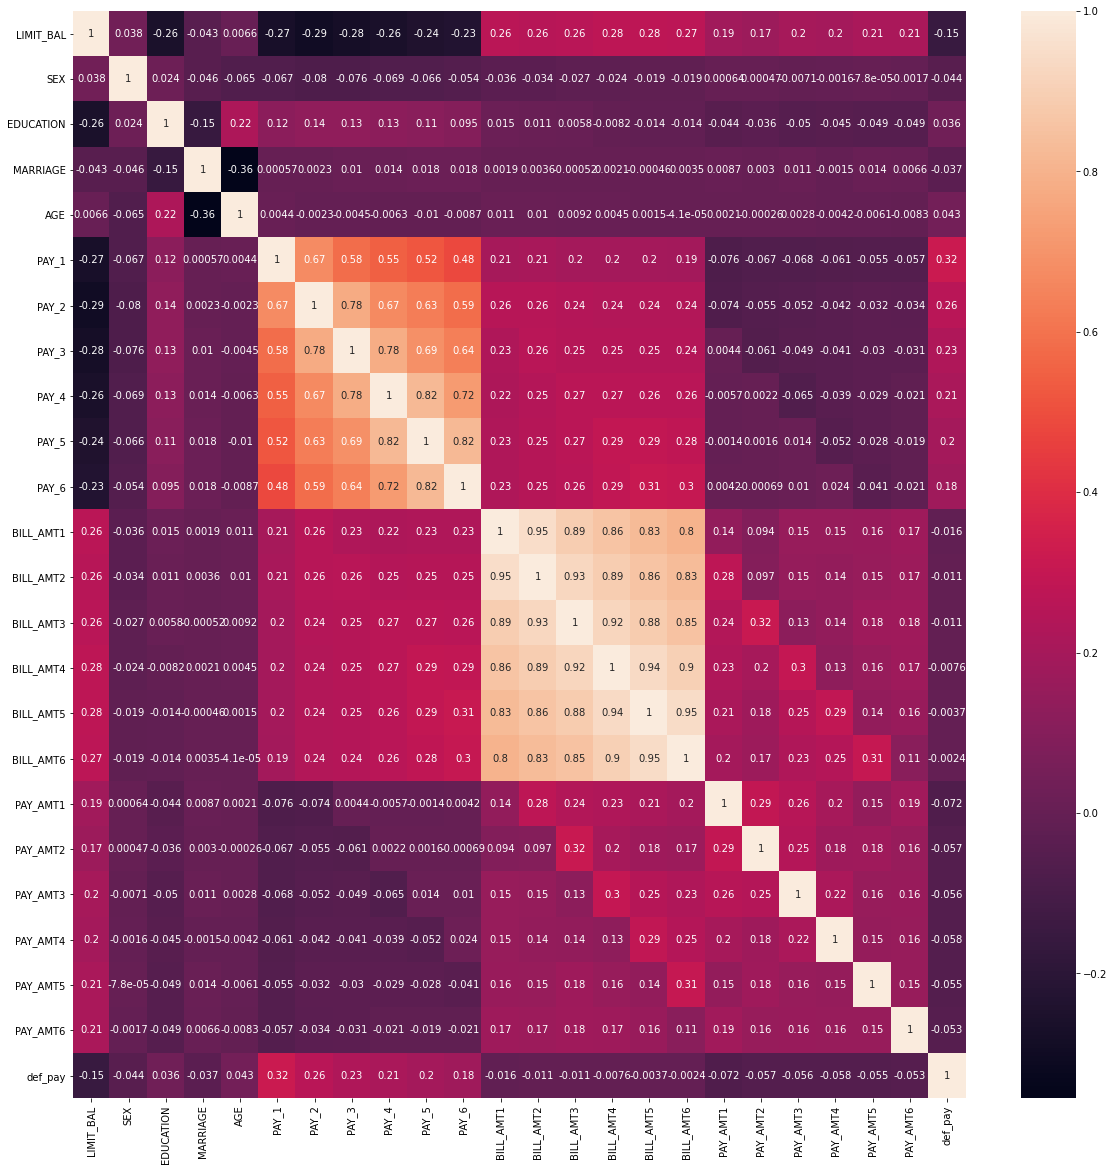

In [28]:
#Hypothesis confirmed
plt.figure(figsize=(20,20))
sns.heatmap(df_copy1_age.corr(), annot=True)

As shown in the heat map we can clearly see that we have a low correlation between age and credit,  marriage and education so let’s try to exclude some

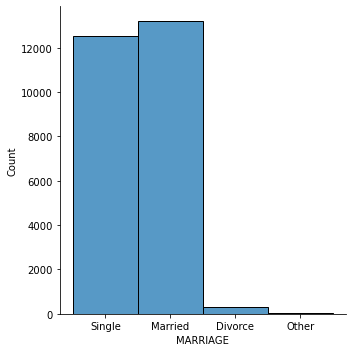

In [29]:
sns.displot(df_copy1_age_cat,x="MARRIAGE")

In [30]:
(df_copy1_age_cat["MARRIAGE"].value_counts()*100)/df_copy1_age_cat.shape[0]

Married    50.59202207
Single     48.03234088
Divorce     1.18021228
Other       0.19542476
Name: MARRIAGE, dtype: float64

In [31]:
df_copy1_age_cat

LIMIT_BAL SEX        EDUCATION MARRIAGE  AGE  PAY_1  PAY_2  PAY_3  PAY_4  PAY_5  ...  \
1         120000   F       University   Single   26     -1      2      0      0      0  ...   
2          90000   F       University   Single   34      0      0      0      0      0  ...   
3          50000   F       University  Married   37      0      0      0      0      0  ...   
4          50000   M       University  Married   57     -1      0     -1      0      0  ...   
5          50000   M  Graduate School   Single   37      0      0      0      0      0  ...   
...          ...  ..              ...      ...  ...    ...    ...    ...    ...    ...  ...   
29995     220000   M      High School  Married   39      0      0      0      0      0  ...   
29996     150000   M      High School   Single   43     -1     -1     -1     -1      0  ...   
29997      30000   M       University   Single   37      4      3      2     -1      0  ...   
29998      80000   M      High School  Married   41      1     -1      0      0      0  ...   
29999      50000   M       University  Married   46      0      0      0      0      0  ...   

       BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  \
1           3272       3455       3261         0      1000      1000      1000         0   
2          14331      14948      15549      1518      1500      1000      1000      1000   
3          28314      28959      29547      2000      2019      1200      1100      1069   
4          20940      19146      19131      2000     36681     10000      9000       689   
5          19394      19619      20024      2500      1815       657      1000      1000   
...          ...        ...        ...       ...       ...       ...       ...       ...   
29995      88004      31237      15980      8500     20000      5003      3047      5000   
29996       8979       5190          0      1837      3526      8998       129         0   
29997      20878      20582      19357         0         0     22000      4200      2000   
29998      52774      11855      48944     85900      3409      1178      1926     52964   
29999      36535      32428      15313      2078      1800      1430      1000      1000   

       PAY_AMT6  def_pay  
1          2000        1  
2          5000        0  
3          1000        0  
4           679        0  
5           800        0  
...         ...      ...  
29995      1000        0  
29996         0        0  
29997      3100        1  
29998      1804        1  
29999      1000        1  

[26097 rows x 24 columns]

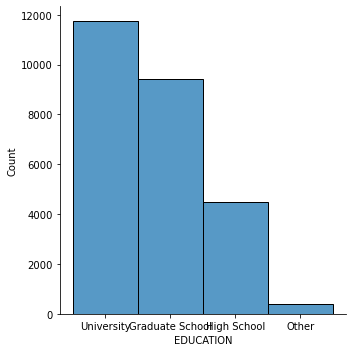

In [32]:
sns.displot(df_copy1_age_cat,x="EDUCATION")

In [33]:
(df_copy1_age_cat["EDUCATION"].value_counts()*100)/df_copy1_age_cat.shape[0]

University         45.01666858
Graduate School    36.16507645
High School        17.24336131
Other               1.57489367
Name: EDUCATION, dtype: float64

<p>
    As you can see, the <b>"Other"</b> category % in both <b>EDUCATION</b> and <b>MARRIAGE</b> are so low. So what if we drop all the rows where <b>EDUCATION = 4</b> and <b>MARRIAGE = 0</b>
</p>

In [34]:
df_copy1_edu = df_copy1_age.drop(df_copy1_age.loc[df_copy1_age.EDUCATION == 4].index, axis=0)
df_copy1_edu_cat = df_copy1_age_cat.drop(df_copy1_age_cat.loc[df_copy1_age.EDUCATION == 4].index, axis=0)

In [35]:
df_copy1_mar = df_copy1_edu.drop(df_copy1_edu.loc[df_copy1_edu.MARRIAGE == 0].index, axis=0)
df_copy1_mar_cat = df_copy1_edu_cat.drop(df_copy1_edu_cat.loc[df_copy1_edu.MARRIAGE == 0].index, axis=0)

In [36]:
df_copy1_mar.shape

(25635, 24)

In [37]:
(df_copy1_mar_cat["EDUCATION"].value_counts()*100)/df_copy1_mar_cat.shape[0]

University         45.80846499
Graduate School    36.80124829
High School        17.39028672
Name: EDUCATION, dtype: float64

In [38]:
(df_copy1_mar_cat["MARRIAGE"].value_counts()*100)/df_copy1_mar_cat.shape[0]

Married    50.62999805
Single     48.19972694
Divorce     1.17027501
Name: MARRIAGE, dtype: float64

We are getting closer to the target. Now let's take a look at the Boxplot to check if there are any outliers remaining.

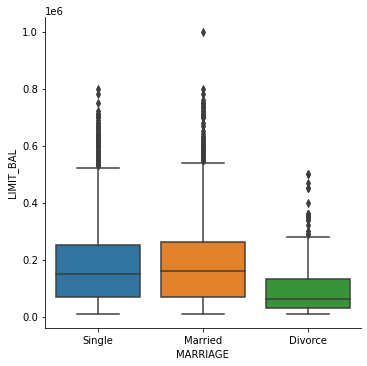

In [39]:
sns.catplot(x="MARRIAGE", y="LIMIT_BAL", kind="box", data=df_copy1_mar_cat)

<p>
    While we analyze the figure, we notice that we have a lot of outliers while LIMIT_BAL value > 550 000.
    To enhance the performance of our model we need to get rid of all LIMIT_BAL values > 550 000

</p>

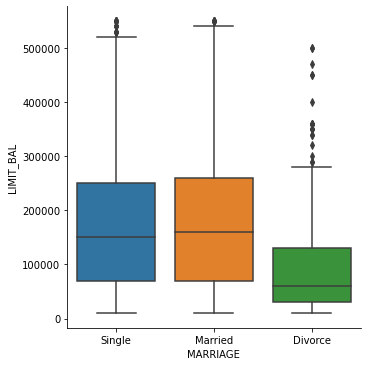

In [40]:
sns.catplot(x="MARRIAGE", y="LIMIT_BAL", kind="box", data=df_copy1_mar_cat.loc[df_copy1_mar_cat.LIMIT_BAL <=550000])

Warning:WE KEPT SOME OUTLIERS AS THEY ARE NECESSARY FOR GETTING A BETTER MODEL.

In [41]:
df_copy1_out1 = df_copy1_mar.loc[df_copy1_mar.LIMIT_BAL <=550000].copy()
df_copy1_out1_cat = df_copy1_mar_cat.loc[df_copy1_mar_cat.LIMIT_BAL <=550000].copy()

In [42]:
df_copy1_out1.shape

(25506, 24)

We are getting closer to our goal, by dropping the outliers from our dataset we have **25506** rows.


However we still have outliers that we need to remove.We start by visualizing the boxplot of the two categories **“Divorce”** and **“Single”** in **MARRIAGE**.

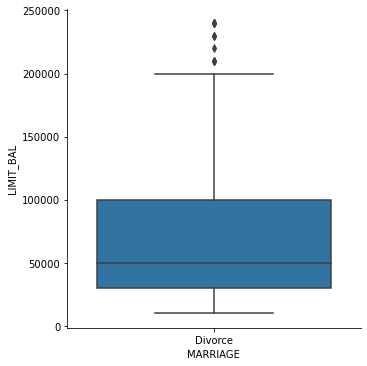

In [43]:
#Outliers in for Divorced
sns.catplot(x="MARRIAGE", y="LIMIT_BAL", kind="box", data=df_copy1_out1_cat.loc[(df_copy1_out1_cat.MARRIAGE == "Divorce")&(df_copy1_out1_cat.LIMIT_BAL <=240000)])

In [44]:
df_copy1_out2 = df_copy1_out1.drop(df_copy1_out1_cat.loc[(df_copy1_out1_cat.MARRIAGE == "Divorce")&(df_copy1_out1_cat.LIMIT_BAL >=240000)].index, axis=0)
df_copy1_out2_cat = df_copy1_out1_cat.drop(df_copy1_out1_cat.loc[(df_copy1_out1_cat.MARRIAGE == "Divorce")&(df_copy1_cat.LIMIT_BAL >=240000)].index, axis=0)

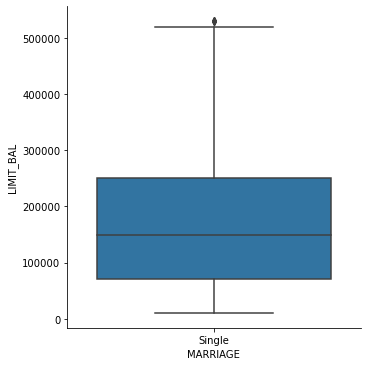

In [45]:
#Outliers in for Divorced
sns.catplot(x="MARRIAGE", y="LIMIT_BAL", kind="box", data=df_copy1_out2_cat.loc[(df_copy1_out2_cat.MARRIAGE == "Single")&(df_copy1_out2_cat.LIMIT_BAL <=530000)])

In [46]:
df_copy1_out3 = df_copy1_out2.drop(df_copy1_out2_cat.loc[(df_copy1_out2_cat.MARRIAGE == "Single")&(df_copy1_out2_cat.LIMIT_BAL >=540000)].index, axis=0)
df_copy1_out3_cat = df_copy1_out2_cat.drop(df_copy1_out2_cat.loc[(df_copy1_out2_cat.MARRIAGE == "Single")&(df_copy1_out2_cat.LIMIT_BAL >=540000)].index, axis=0)

we notice that we have a lot of outliers while LIMIT_BAL value > 530 000 in “Divorce” and LIMIT_BAL value > 240 000 in “Single”.


We removed the outliers from the dataset as you can see in the boxplot:


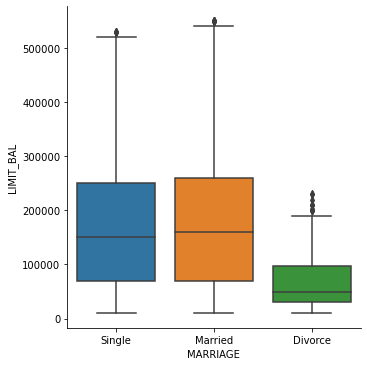

In [47]:
sns.catplot(x="MARRIAGE", y="LIMIT_BAL", kind="box", data=df_copy1_out3_cat)

And now we have 25462 rows:

In [48]:
df_copy1_out3.shape

(25462, 24)

In [49]:
def getColumnsNames(prefix):
    return [prefix+str(x) for x in range(1,7)]

##### In the following bar plots we can visualize the count of the default payers and non default payers in each month

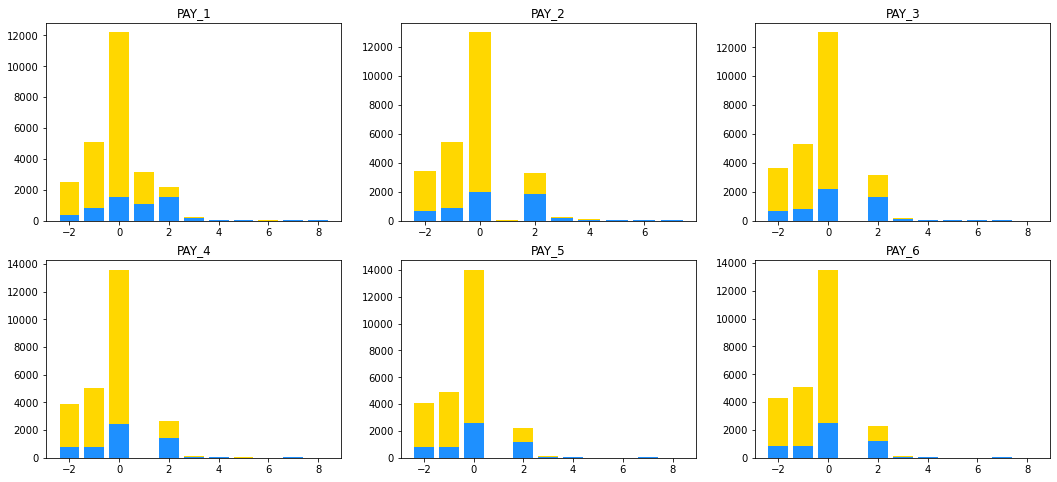

In [50]:
pay_status_columns = getColumnsNames('PAY_')
figure, ax = plt.subplots(2,3)
figure.set_size_inches(18,8)


for i in range(len(pay_status_columns)):
    row,col = int(i/3), i%3

    d  = df_copy1_out3[pay_status_columns[i]].value_counts()
    x = df_copy1_out3[pay_status_columns[i]][(df_copy1_out3['def_pay']==1)].value_counts()
    ax[row,col].bar(d.index, d, align='center', color='gold')
    ax[row,col].bar(x.index, x, align='center', color='dodgerblue', alpha=1)
    ax[row,col].set_title(pay_status_columns[i])

plt.show()

##### In the following histograms we can visualize the payment amount for each month for both the default payers and the non default payers 

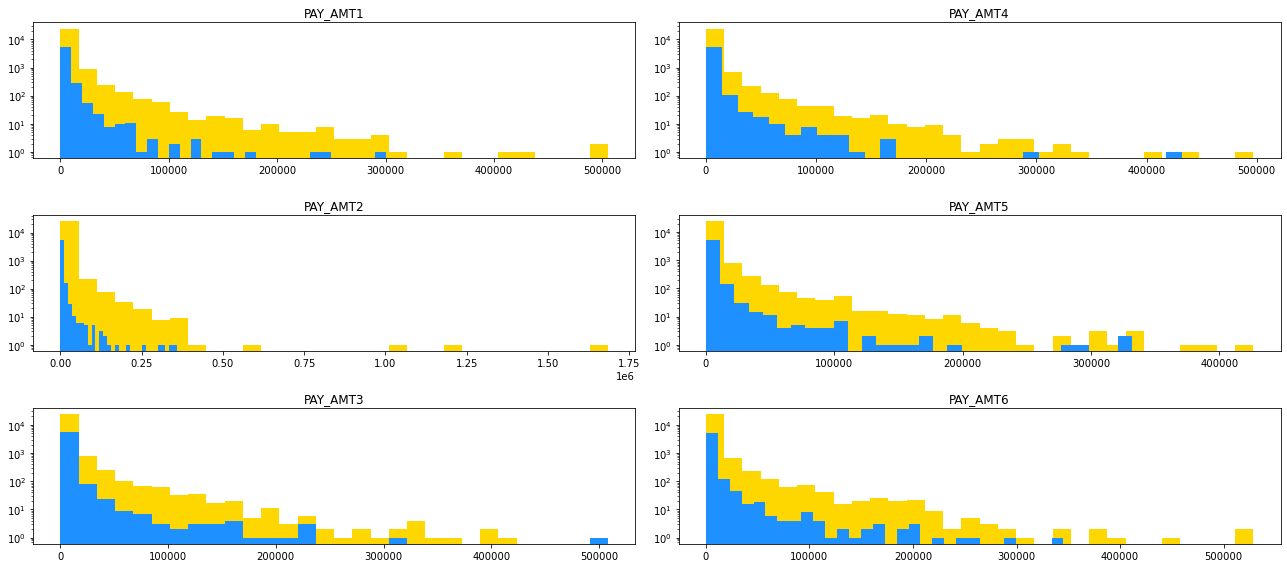

In [51]:
pay_amt_columns = getColumnsNames('PAY_AMT')
figure, ax = plt.subplots(3,2)
figure.set_size_inches(18,8)

for i in range(len(pay_status_columns)):
    row,col =  i%3, int(i/3)
   
    ax[row,col].hist(df_copy1_out3[pay_amt_columns[i]], 30, color ='gold')
    ax[row,col].hist(df_copy1_out3[pay_amt_columns[i]][(df_copy1_out3['def_pay']==1)],30,color='dodgerblue',alpha = 1)
    ax[row,col].set_title(pay_amt_columns[i])
    #adding scaling to make the graph more helpful
    ax[row,col].set_yscale('log', nonposy='clip')
plt.tight_layout()
plt.show()

##### In the following histograms we can visualize the Bill Statement for each month for both the default payers and the non default payers 

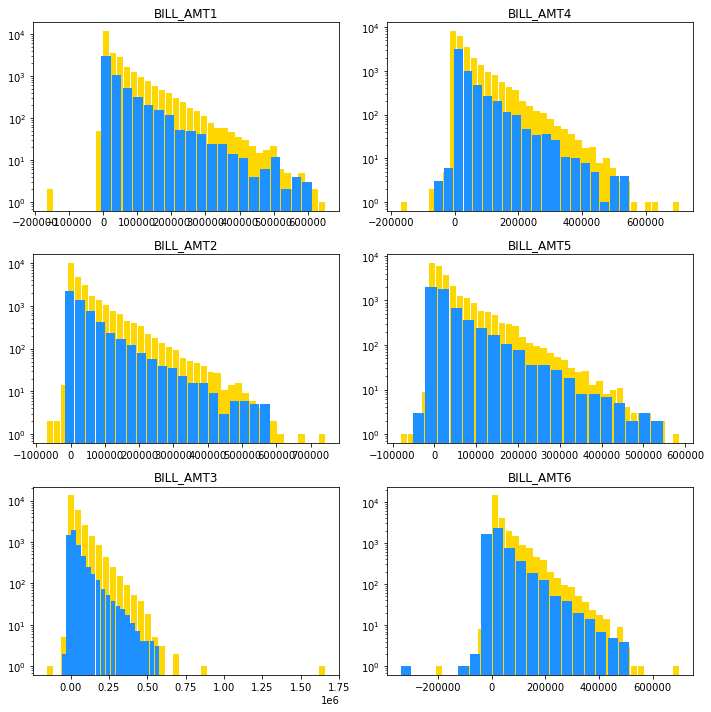

In [52]:
bill_atm_columns =  getColumnsNames('BILL_AMT')
figure, ax = plt.subplots(3,2)
figure.set_size_inches(10,10)


for i in range(len(pay_status_columns)):
    row,col =  i%3, int(i/3)
   
    ax[row,col].hist(df_copy1_out3[bill_atm_columns[i]], 40,rwidth=0.9, color ='gold')
    ax[row,col].hist(df_copy1_out3[bill_atm_columns[i]][(df_copy1_out3['def_pay']==1)],20,rwidth=0.9,color='dodgerblue',alpha = 1)
    ax[row,col].set_title(bill_atm_columns[i])
    #adding scaling to make the graph more helpful
    ax[row,col].set_yscale('log', nonposy='clip')
plt.tight_layout()
plt.show()

#### Data discertisation

<p>
   To ensure the efficiency of our model while analysing the data , we need group numerical objects into buckets or bins. in our case we will just group the <b>Age</b> sample
</p>

In [53]:
df_copy1_out3.loc[df_copy1_out3.AGE < 40, 'AGE'] = 0 ## Young Adults 
df_copy1_out3.loc[(df_copy1_out3.AGE < 60) & (df_copy1_out3.AGE > 39), 'AGE'] = 1 ## Middle-Aged Adults
df_copy1_out3.loc[df_copy1_out3.AGE >59, 'AGE'] = 2 ## Old Adults 

### Feature Engineering

#### Features Crossing

In order to better understand the **Bill statement amount** and the **Payment amount** we need the **outstanding amount**.
Let's add these Features into our data frame.

In [54]:
df_copy1_out3['BILL_TOT'] = df_copy1_out3['BILL_AMT1'] + df_copy1_out3['BILL_AMT2'] + df_copy1_out3['BILL_AMT3'] + df_copy1_out3['BILL_AMT4'] +df_copy1_out3['BILL_AMT5'] + df_copy1_out3['BILL_AMT6']
df_copy1_out3['PAY_AMT_TOT'] = df_copy1_out3['PAY_AMT1'] + df_copy1_out3['PAY_AMT2'] + df_copy1_out3['PAY_AMT3'] + df_copy1_out3['PAY_AMT4'] + df_copy1_out3['PAY_AMT5'] + df_copy1_out3['PAY_AMT6']
df_copy1_out3['REMAINING_PAY_BALANCE'] = df_copy1_out3['BILL_TOT'] - df_copy1_out3['PAY_AMT_TOT']

<AxesSubplot:>

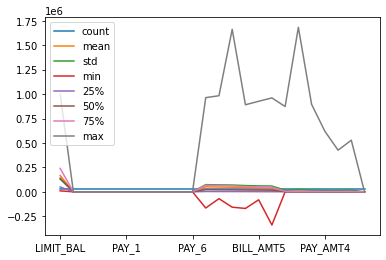

In [55]:
pd.set_option('display.width', 100)
pd.set_option('precision', 8)
df.describe().T.plot()

From the previous figure of the describtion of the dataframe, we can see that there exists an negative minimum value in the **Bill statement**.
<blockquote>A negative balance indicates that the bill was overpaid and that he/she may be eligible for a refund. He/She may only receive his/her refund after the semester starts and his/her anticipated credits are disbursed to his/her student account.</blockquote>

After adding new features we cross visualized them in order to detect the presence of any outliers and handle them

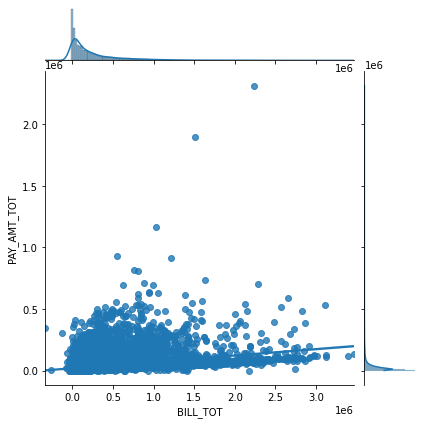

In [56]:
#sns.jointplot(x="BILL_TOT", y="PAY_AMT_TOT", data=df_copy1_out3.loc[df_copy1_out3.PAY_AMT_TOT < 1000000], kind="reg");
sns.jointplot(x="BILL_TOT", y="PAY_AMT_TOT", data=df_copy1_out3, kind="reg");

In [57]:
df_final = df_copy1_out3.loc[df_copy1_out3.PAY_AMT_TOT < 1000000].copy()

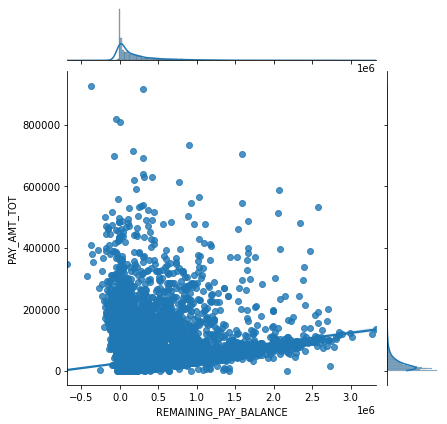

In [58]:
sns.jointplot(y="PAY_AMT_TOT", x="REMAINING_PAY_BALANCE", data=df_final, kind="reg");

In [59]:
df_final = df_final.loc[(df_final.PAY_AMT_TOT < 700000)&(df_final.REMAINING_PAY_BALANCE < 3280000)].copy()

#### Feature encoding

In [60]:
def onehot_encode(df, column_dict):
    df = df.copy()
    for column, prefix in column_dict.items():
        dummies = pd.get_dummies(df[column], prefix=prefix)
        df = pd.concat([df, dummies], axis=1)
        df = df.drop(column, axis=1)
    return df

In [61]:
df_copy1_out3 = onehot_encode(
        df_copy1_out3,
        {
            'EDUCATION': 'EDUCATION',
            'MARRIAGE': 'MARRIAGE',
            'SEX': 'SEX',
            'AGE': 'AGE',
            'PAY_1': 'PAY_1_', 
            'PAY_2': 'PAY_2_',
            'PAY_3': 'PAY_3_',
            'PAY_4': 'PAY_4_',
            'PAY_5': 'PAY_5_',
            'PAY_6': 'PAY_6_'
        }
    )


In [62]:
df_copy1_out3

LIMIT_BAL  BILL_AMT1  BILL_AMT2  BILL_AMT3  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  \
1         120000       2682       1725       2682       3272       3455       3261         0   
2          90000      29239      14027      13559      14331      14948      15549      1518   
3          50000      46990      48233      49291      28314      28959      29547      2000   
4          50000       8617       5670      35835      20940      19146      19131      2000   
5          50000      64400      57069      57608      19394      19619      20024      2500   
...          ...        ...        ...        ...        ...        ...        ...       ...   
29995     220000     188948     192815     208365      88004      31237      15980      8500   
29996     150000       1683       1828       3502       8979       5190          0      1837   
29997      30000       3565       3356       2758      20878      20582      19357         0   
29998      80000      -1645      78379      76304      52774      11855      48944     85900   
29999      50000      47929      48905      49764      36535      32428      15313      2078   

       PAY_AMT2  PAY_AMT3  ...  PAY_6__-2  PAY_6__-1  PAY_6__0  PAY_6__2  PAY_6__3  PAY_6__4  \
1          1000      1000  ...          0          0         0         1         0         0   
2          1500      1000  ...          0          0         1         0         0         0   
3          2019      1200  ...          0          0         1         0         0         0   
4         36681     10000  ...          0          0         1         0         0         0   
5          1815       657  ...          0          0         1         0         0         0   
...         ...       ...  ...        ...        ...       ...       ...       ...       ...   
29995     20000      5003  ...          0          0         1         0         0         0   
29996      3526      8998  ...          0          0         1         0         0         0   
29997         0     22000  ...          0          0         1         0         0         0   
29998      3409      1178  ...          0          1         0         0         0         0   
29999      1800      1430  ...          0          0         1         0         0         0   

       PAY_6__5  PAY_6__6  PAY_6__7  PAY_6__8  
1             0         0         0         0  
2             0         0         0         0  
3             0         0         0         0  
4             0         0         0         0  
5             0         0         0         0  
...         ...       ...       ...       ...  
29995         0         0         0         0  
29996         0         0         0         0  
29997         0         0         0         0  
29998         0         0         0         0  
29999         0         0         0         0  

[25462 rows x 91 columns]

#### Feature Normalization

In [63]:
##Features to normalize
col_to_norm = ['LIMIT_BAL', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5',
                   'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 
                   'BILL_TOT', 'PAY_AMT_TOT', 'REMAINING_PAY_BALANCE']

In [64]:
def featureSelect(df_x):
    return df_x.drop(['def_pay'], axis=1), df_x['def_pay']

In [65]:
def Normalization(X, scaler="minmax"):
    if scaler.upper() == "STANDARD":
        stand = StandardScaler()
        X_s = stand.fit_transform(X)
        return X_s
    else:
        minmax = MinMaxScaler()
        X_mm = minmax.fit_transform(X)
        return X_mm

In [66]:
X, y = featureSelect(df_copy1_out3)

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

Normalization using standard scaling

In [68]:
X_train[col_to_norm]= Normalization(X_train[col_to_norm], scaler="standard")
X_test[col_to_norm]= Normalization(X_test[col_to_norm], scaler="standard")

#### Feature Selection

We will perform a feature selection using the <strong>CatBoost</strong> algorithm <strong>features importances</strong> to select the best features that would contirbute the most to optimizing and enhancing our model

In [69]:
# CatBoost model definition
catboost_model = CatBoostClassifier(iterations=1000,
                                    custom_loss=['Accuracy'],
                                    loss_function='Logloss'
                                   )
train_pool = Pool(X_train,y_train)
# Fit CatBoost model
catboost_model.fit(train_pool,
                   plot=True)


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.037313
0:	learn: 0.6723477	total: 191ms	remaining: 3m 11s
1:	learn: 0.6524973	total: 217ms	remaining: 1m 48s
2:	learn: 0.6347059	total: 257ms	remaining: 1m 25s
3:	learn: 0.6188248	total: 278ms	remaining: 1m 9s
4:	learn: 0.6039225	total: 306ms	remaining: 1m
5:	learn: 0.5904785	total: 335ms	remaining: 55.4s
6:	learn: 0.5773987	total: 382ms	remaining: 54.1s
7:	learn: 0.5655560	total: 396ms	remaining: 49s
8:	learn: 0.5543829	total: 430ms	remaining: 47.4s
9:	learn: 0.5447082	total: 451ms	remaining: 44.6s
10:	learn: 0.5353467	total: 486ms	remaining: 43.7s
11:	learn: 0.5273784	total: 518ms	remaining: 42.6s
12:	learn: 0.5197785	total: 567ms	remaining: 43.1s
13:	learn: 0.5126334	total: 599ms	remaining: 42.2s
14:	learn: 0.5062634	total: 646ms	remaining: 42.4s
15:	learn: 0.5004736	total: 678ms	remaining: 41.7s
16:	learn: 0.4949037	total: 699ms	remaining: 40.4s
17:	learn: 0.4898395	total: 749ms	remaining: 40.9s
18:	learn: 0.4850382	total: 766ms	remaining: 39.5s
19:	learn: 0.

162:	learn: 0.4071137	total: 5.35s	remaining: 27.5s
163:	learn: 0.4070310	total: 5.4s	remaining: 27.5s
164:	learn: 0.4069220	total: 5.45s	remaining: 27.6s
165:	learn: 0.4068110	total: 5.49s	remaining: 27.6s
166:	learn: 0.4067543	total: 5.51s	remaining: 27.5s
167:	learn: 0.4066560	total: 5.56s	remaining: 27.5s
168:	learn: 0.4065873	total: 5.59s	remaining: 27.5s
169:	learn: 0.4065118	total: 5.62s	remaining: 27.4s
170:	learn: 0.4064509	total: 5.67s	remaining: 27.5s
171:	learn: 0.4063649	total: 5.69s	remaining: 27.4s
172:	learn: 0.4063066	total: 5.73s	remaining: 27.4s
173:	learn: 0.4062233	total: 5.75s	remaining: 27.3s
174:	learn: 0.4061276	total: 5.78s	remaining: 27.3s
175:	learn: 0.4060074	total: 5.81s	remaining: 27.2s
176:	learn: 0.4059010	total: 5.84s	remaining: 27.2s
177:	learn: 0.4058319	total: 5.89s	remaining: 27.2s
178:	learn: 0.4057561	total: 5.94s	remaining: 27.2s
179:	learn: 0.4056462	total: 5.98s	remaining: 27.3s
180:	learn: 0.4055281	total: 6.01s	remaining: 27.2s
181:	learn: 0

325:	learn: 0.3912940	total: 10.3s	remaining: 21.2s
326:	learn: 0.3912253	total: 10.3s	remaining: 21.2s
327:	learn: 0.3911264	total: 10.3s	remaining: 21.1s
328:	learn: 0.3910237	total: 10.3s	remaining: 21.1s
329:	learn: 0.3909599	total: 10.4s	remaining: 21.1s
330:	learn: 0.3908684	total: 10.4s	remaining: 21.1s
331:	learn: 0.3907828	total: 10.5s	remaining: 21.1s
332:	learn: 0.3906311	total: 10.5s	remaining: 21.1s
333:	learn: 0.3904686	total: 10.6s	remaining: 21.1s
334:	learn: 0.3903500	total: 10.6s	remaining: 21.1s
335:	learn: 0.3901945	total: 10.6s	remaining: 21s
336:	learn: 0.3901152	total: 10.7s	remaining: 21s
337:	learn: 0.3899787	total: 10.7s	remaining: 21s
338:	learn: 0.3898503	total: 10.8s	remaining: 21s
339:	learn: 0.3897584	total: 10.8s	remaining: 20.9s
340:	learn: 0.3896638	total: 10.8s	remaining: 20.9s
341:	learn: 0.3895191	total: 10.9s	remaining: 20.9s
342:	learn: 0.3894086	total: 10.9s	remaining: 20.9s
343:	learn: 0.3892983	total: 10.9s	remaining: 20.9s
344:	learn: 0.389135

488:	learn: 0.3745629	total: 15.4s	remaining: 16.1s
489:	learn: 0.3744344	total: 15.4s	remaining: 16s
490:	learn: 0.3743116	total: 15.4s	remaining: 16s
491:	learn: 0.3742267	total: 15.5s	remaining: 16s
492:	learn: 0.3741061	total: 15.5s	remaining: 16s
493:	learn: 0.3739038	total: 15.5s	remaining: 15.9s
494:	learn: 0.3738716	total: 15.6s	remaining: 15.9s
495:	learn: 0.3738176	total: 15.6s	remaining: 15.8s
496:	learn: 0.3737309	total: 15.6s	remaining: 15.8s
497:	learn: 0.3736555	total: 15.7s	remaining: 15.8s
498:	learn: 0.3735338	total: 15.7s	remaining: 15.8s
499:	learn: 0.3734615	total: 15.7s	remaining: 15.7s
500:	learn: 0.3733611	total: 15.7s	remaining: 15.7s
501:	learn: 0.3732924	total: 15.8s	remaining: 15.6s
502:	learn: 0.3731784	total: 15.8s	remaining: 15.6s
503:	learn: 0.3730680	total: 15.8s	remaining: 15.5s
504:	learn: 0.3730180	total: 15.8s	remaining: 15.5s
505:	learn: 0.3729176	total: 15.9s	remaining: 15.5s
506:	learn: 0.3728277	total: 15.9s	remaining: 15.4s
507:	learn: 0.372697

650:	learn: 0.3595350	total: 20.2s	remaining: 10.8s
651:	learn: 0.3594357	total: 20.2s	remaining: 10.8s
652:	learn: 0.3593101	total: 20.2s	remaining: 10.7s
653:	learn: 0.3592182	total: 20.3s	remaining: 10.7s
654:	learn: 0.3591253	total: 20.3s	remaining: 10.7s
655:	learn: 0.3590599	total: 20.3s	remaining: 10.7s
656:	learn: 0.3589700	total: 20.4s	remaining: 10.6s
657:	learn: 0.3588660	total: 20.4s	remaining: 10.6s
658:	learn: 0.3587899	total: 20.5s	remaining: 10.6s
659:	learn: 0.3587356	total: 20.5s	remaining: 10.6s
660:	learn: 0.3586297	total: 20.6s	remaining: 10.5s
661:	learn: 0.3585415	total: 20.6s	remaining: 10.5s
662:	learn: 0.3584628	total: 20.6s	remaining: 10.5s
663:	learn: 0.3583669	total: 20.7s	remaining: 10.5s
664:	learn: 0.3582687	total: 20.7s	remaining: 10.4s
665:	learn: 0.3582218	total: 20.7s	remaining: 10.4s
666:	learn: 0.3581604	total: 20.8s	remaining: 10.4s
667:	learn: 0.3580748	total: 20.8s	remaining: 10.3s
668:	learn: 0.3579728	total: 20.9s	remaining: 10.3s
669:	learn: 

810:	learn: 0.3460963	total: 25.3s	remaining: 5.9s
811:	learn: 0.3460114	total: 25.4s	remaining: 5.87s
812:	learn: 0.3459304	total: 25.4s	remaining: 5.84s
813:	learn: 0.3458605	total: 25.4s	remaining: 5.81s
814:	learn: 0.3457540	total: 25.5s	remaining: 5.78s
815:	learn: 0.3456351	total: 25.5s	remaining: 5.75s
816:	learn: 0.3455522	total: 25.5s	remaining: 5.72s
817:	learn: 0.3454795	total: 25.6s	remaining: 5.69s
818:	learn: 0.3453877	total: 25.6s	remaining: 5.66s
819:	learn: 0.3453398	total: 25.6s	remaining: 5.62s
820:	learn: 0.3452060	total: 25.7s	remaining: 5.59s
821:	learn: 0.3451145	total: 25.7s	remaining: 5.56s
822:	learn: 0.3449829	total: 25.7s	remaining: 5.53s
823:	learn: 0.3448459	total: 25.7s	remaining: 5.5s
824:	learn: 0.3447570	total: 25.8s	remaining: 5.46s
825:	learn: 0.3446825	total: 25.8s	remaining: 5.43s
826:	learn: 0.3445734	total: 25.8s	remaining: 5.4s
827:	learn: 0.3445281	total: 25.8s	remaining: 5.37s
828:	learn: 0.3444712	total: 25.9s	remaining: 5.33s
829:	learn: 0.3

976:	learn: 0.3332624	total: 30.2s	remaining: 712ms
977:	learn: 0.3331776	total: 30.3s	remaining: 681ms
978:	learn: 0.3331211	total: 30.3s	remaining: 650ms
979:	learn: 0.3330683	total: 30.3s	remaining: 619ms
980:	learn: 0.3330228	total: 30.3s	remaining: 588ms
981:	learn: 0.3329687	total: 30.4s	remaining: 557ms
982:	learn: 0.3328362	total: 30.4s	remaining: 526ms
983:	learn: 0.3327391	total: 30.5s	remaining: 495ms
984:	learn: 0.3326763	total: 30.5s	remaining: 465ms
985:	learn: 0.3326265	total: 30.5s	remaining: 434ms
986:	learn: 0.3325217	total: 30.6s	remaining: 403ms
987:	learn: 0.3324220	total: 30.6s	remaining: 372ms
988:	learn: 0.3323234	total: 30.7s	remaining: 341ms
989:	learn: 0.3322718	total: 30.7s	remaining: 310ms
990:	learn: 0.3321925	total: 30.7s	remaining: 279ms
991:	learn: 0.3320944	total: 30.8s	remaining: 248ms
992:	learn: 0.3320602	total: 30.8s	remaining: 217ms
993:	learn: 0.3319970	total: 30.9s	remaining: 186ms
994:	learn: 0.3319549	total: 30.9s	remaining: 155ms
995:	learn: 

imp                    col
18  0.57094548            EDUCATION_3
43  0.57113087               PAY_2__3
16  0.60189599            EDUCATION_1
20  0.62391405             MARRIAGE_2
17  0.65350084            EDUCATION_2
83  0.66264588               PAY_6__2
32  0.69909984               PAY_1__3
22  0.72749312                  SEX_1
29  0.72921664               PAY_1__0
63  1.01572626               PAY_4__2
52  1.11014640               PAY_3__2
73  1.31493985               PAY_5__2
42  2.14844438               PAY_2__2
4   2.79857917              BILL_AMT4
5   2.96564634              BILL_AMT5
3   3.08493130              BILL_AMT3
13  3.20724110               BILL_TOT
15  3.21967141  REMAINING_PAY_BALANCE
6   3.87128377              BILL_AMT6
2   3.88672368              BILL_AMT2
11  4.01382056               PAY_AMT5
10  4.36449623               PAY_AMT4
8   4.85148701               PAY_AMT2
12  5.31345957               PAY_AMT6
9   5.43375837               PAY_AMT3
14  5.89829046            PAY_AMT_TOT
1   6.30212649              BILL_AMT1
7   6.38362115               PAY_AMT1
31  6.77422184               PAY_1__2
0   7.66541991              LIMIT_BAL

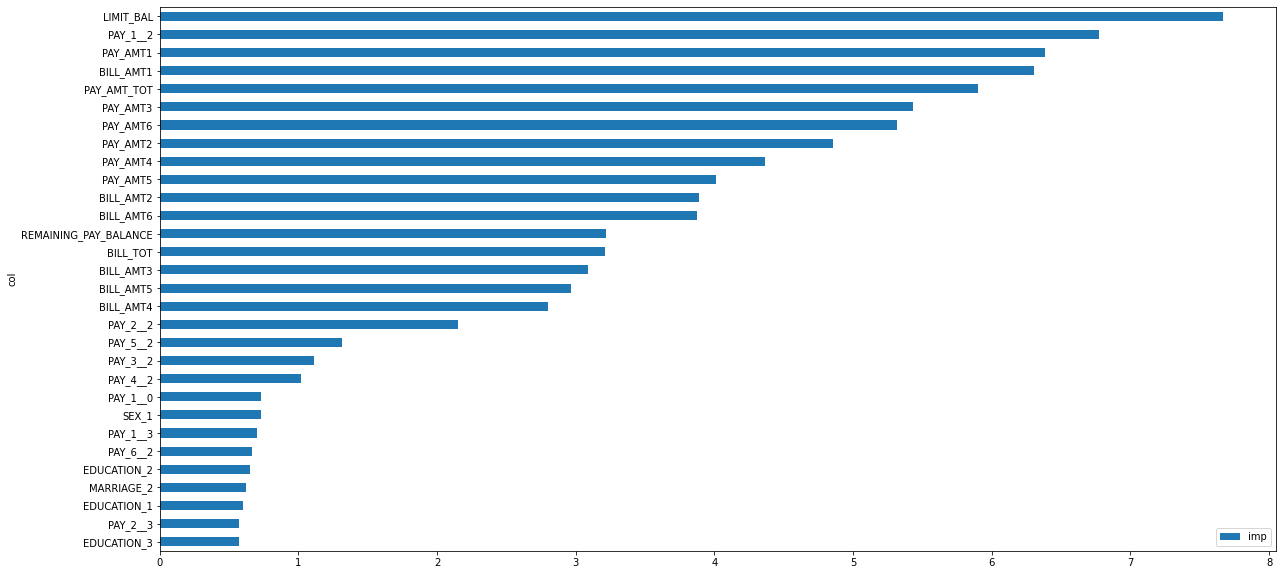

In [70]:
# Feature Importances : the importance of the feauture that contributed to the learning of our model sroted from most important to least important

def feature_importance(model, data):
    """
    Function to show which features are most important in the model.
    ::param_model:: Which model to use?
    ::param_data:: What data to use?
    """
    fea_imp = pd.DataFrame({'imp': model.feature_importances_, 'col': data.columns})
    fea_imp = fea_imp.sort_values(['imp', 'col'], ascending=[True, False]).iloc[-30:]
    _= fea_imp.plot(kind='barh', x='col', y='imp', figsize=(20, 10))
    return fea_imp


feature_importance(catboost_model, X_train)

<p>
    As we can obsurve, the features <i>Age, Education, Marriage and Sex</i> have an importance below 1. We can deduce that these features have low to none impact on our dataset so we can <b>drop</b> them from this one.
</p>

In [71]:
df_final = df_copy1_out3.drop(['SEX_1', 'SEX_2', 'EDUCATION_1',
       'EDUCATION_2', 'EDUCATION_3', 'MARRIAGE_1', 'MARRIAGE_2', 'MARRIAGE_3', 'AGE_0', 'AGE_1',
       'AGE_2'], axis=1).copy()

#### Isolation forest

The Isolation Forest algorithm is a fast tree-based algorithm for anomaly detection.
it takes advantage of the following properties : 

Fewness : anomalous samples are a minority and there will only be a few of them in any dataset

Different : anomalous samples have values/attributes that are very different from those of normal samples

In [72]:
def remove_outliers(df):
    clf = IsolationForest(random_state=0).fit(df)
    anomaly = clf.predict(df)
    df['anomaly']= anomaly
    outliers=df.loc[df['anomaly']==-1]
    outlier_index=list(outliers.index)
    print(df['anomaly'].value_counts())
    df = df[df['anomaly'] != -1]
    return df.loc[df['anomaly']== 1]

In [73]:
df_final = remove_outliers(df_final.copy()) 
df_final.drop(['anomaly'], axis=1, inplace=True)

 1    23771
-1     1691
Name: anomaly, dtype: int64


## IV. Modeling 
###### Expliquer et justifier le choix, le paramétrage et le test de différents algorithmes 

We chose different machine learning algorythms to solve our classification problem for these reasons:


**I K Nearest Neighbors**

<blockquote>KNN is more widely used in classification problems in the industry.It focuses on easy implementation and good performance.
In our case, our dataset is labeled and its size is considerably small so we can apply KNN.</blockquote>



**II Decisition Tree**

<blockquote>Decision trees are used for handling non-linear data sets effectively.They are used to create a model that is very easy to explain by dividing the data set into smaller data sets based on the descriptive features until it reaches a small enough set that contains data points that fall under one label.</blockquote>





**III SVM**

<blockquote>SVM is a supervised machine learning algorithm which can be used for classification or regression problems.
It does some extremely complex data transformations, then figures out how to seperate the data based on the labels :{0,1}</blockquote>





**IV Logistic Regression**

<blockquote>Logistic regression is applied when the prediction is categorical
for example, yes or no, true or false, 0 or 1
in our case we need to predict def_pay 1 or 0</blockquote>





**V Random Forest**

<blockquote>Random forest is used for classification problems.It handles the missing values, prevent over-fitting and provides higher accuracy through cross validation.</blockquote>


**VI Gradient Boosting**
<blockquote>
    As gradient boosting is one of the boosting algorithms it is used to minimize bias error of the model.
</blockquote>



**VII X Gradient Boost**
<blockquote>XGBoost is a refined and customized version of a gradient boosting decision tree system, created with performance and speed in mind. </blockquote>



**VIII Stochastic Gradient Descent**
<blockquote>
 Stochastic Gradient Descent (SGD) is a simple yet very efficient approach for classification   
</blockquote>


**VIII Naive Bayes**
<blockquote>
    Naive Bayes is suitable for solving multi-class prediction problems, It is easy and fast to predict the class of the test       data set.
</blockquote>

**IX CatBoost**
<blockquote>
    Catboost is easy to use and has built in advantages such as crossvalidation, girdsearch, real time visualisations 
    it is also used to select features. 
    It is one of the newest classification algorithms and also known for its low execution time.
    It's compatible with large and huge datasets.
</blockquote>


**X Light GBM**
<blockquote>
 Faster training speed and higher efficiency.
    
Lower memory usage.
    
Better accuracy.
    
Support of parallel and GPU learning.
</blockquote>


**XI Artificial Neural Networks**
<blockquote>
 Useful for non linear and complex relationships 
    
 Neural network is very useful for large datasets 
</blockquote>



### Implementing all the models

In [74]:
models = {
    KNeighborsClassifier():["K Nearest Neighbors"],
    DecisionTreeClassifier():["Decisition Tree"],
    SVC():["SVM"],
    LogisticRegression():["Logistic Regression"],
    GaussianNB():["Naive Bayes"],
    MLPClassifier():["Artificial Neural Network"],
    RandomForestClassifier():["Random Forest"],
    GradientBoostingClassifier():["Gradient Boosting"],
    LGBMClassifier():["Light GBM"],
    SGDClassifier():["Stochastic Gradient Descent"],
    XGBClassifier():["X Gradient Boost"]
}


In [75]:
def ModelSelection(df, mod):
    col_to_norm = ['LIMIT_BAL', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5',
                   'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 
                   'BILL_TOT', 'PAY_AMT_TOT', 'REMAINING_PAY_BALANCE']
    metrics = {
        'Model':[],
        'Accuracy':[],
        'Precision':[],
        'Recall':[],
        'F1':[],
        'AUC':[]
    }
    test_pred=[]
    ##Selecting the features and the label
    X, y = featureSelect(df)
    ##Splitting and scaling
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)
    X_train[col_to_norm]= Normalization(X_train[col_to_norm], scaler="standard")
    X_test[col_to_norm]= Normalization(X_test[col_to_norm], scaler="standard")
    ##Training and predicting
    
        
    for model, table in mod.items():
        print(table[0])
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        metrics['Model'].append(table[0])
        ##scores
        metrics['Accuracy'].append(accuracy_score(y_test, y_pred))
        metrics['Precision'].append(precision_score(y_test, y_pred))
        metrics['Recall'].append(recall_score(y_test, y_pred))
        metrics['F1'].append(f1_score(y_test, y_pred))
        metrics['AUC'].append(roc_auc_score(y_test, y_pred))
        ##test predict values
        test_pred.append((table[0],y_test, y_pred, roc_auc_score(y_test, y_pred)))
    #print(metrics)
    return pd.DataFrame(metrics), test_pred

In [76]:
warnings.filterwarnings('ignore')
summary, _= ModelSelection(df_final, models)

K Nearest Neighbors
Decisition Tree
SVM
Logistic Regression
Naive Bayes
Artificial Neural Network
Random Forest
Gradient Boosting
Light GBM
Stochastic Gradient Descent
X Gradient Boost
[15:08:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


### CatBoost

In [77]:

X, y = featureSelect(df_final)
    ##Splitting and scaling
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)
X_train[col_to_norm]= Normalization(X_train[col_to_norm], scaler="standard")
X_test[col_to_norm]= Normalization(X_test[col_to_norm], scaler="standard")
train_pool = Pool(X_train,y_train)

# CatBoost model definition
catboost_model = CatBoostClassifier(iterations=1000,
                                    custom_loss=['Accuracy'],
                                    loss_function='Logloss'
                                   )

# Fit CatBoost model
catboost_model.fit(train_pool,
                   plot=True)

# CatBoost accuracy
acc_catboost = round(catboost_model.score(X_train, y_train) * 100, 2)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.036234
0:	learn: 0.6726492	total: 49.4ms	remaining: 49.3s
1:	learn: 0.6540346	total: 55.3ms	remaining: 27.6s
2:	learn: 0.6395684	total: 58.4ms	remaining: 19.4s
3:	learn: 0.6235948	total: 64.5ms	remaining: 16.1s
4:	learn: 0.6094487	total: 70.5ms	remaining: 14s
5:	learn: 0.5965315	total: 76.3ms	remaining: 12.6s
6:	learn: 0.5834670	total: 82.1ms	remaining: 11.7s
7:	learn: 0.5719129	total: 87.6ms	remaining: 10.9s
8:	learn: 0.5612142	total: 94ms	remaining: 10.3s
9:	learn: 0.5510602	total: 100ms	remaining: 9.91s
10:	learn: 0.5416466	total: 106ms	remaining: 9.54s
11:	learn: 0.5331386	total: 112ms	remaining: 9.23s
12:	learn: 0.5252997	total: 119ms	remaining: 9.01s
13:	learn: 0.5181073	total: 125ms	remaining: 8.84s
14:	learn: 0.5114692	total: 132ms	remaining: 8.69s
15:	learn: 0.5057163	total: 139ms	remaining: 8.56s
16:	learn: 0.5002190	total: 146ms	remaining: 8.43s
17:	learn: 0.4948233	total: 152ms	remaining: 8.29s
18:	learn: 0.4897507	total: 158ms	remaining: 8.17s
19:	le

163:	learn: 0.4112796	total: 1.09s	remaining: 5.56s
164:	learn: 0.4112080	total: 1.1s	remaining: 5.56s
165:	learn: 0.4110932	total: 1.1s	remaining: 5.55s
166:	learn: 0.4109848	total: 1.11s	remaining: 5.55s
167:	learn: 0.4108971	total: 1.12s	remaining: 5.54s
168:	learn: 0.4108059	total: 1.13s	remaining: 5.53s
169:	learn: 0.4106949	total: 1.13s	remaining: 5.53s
170:	learn: 0.4106109	total: 1.14s	remaining: 5.52s
171:	learn: 0.4105486	total: 1.14s	remaining: 5.51s
172:	learn: 0.4104159	total: 1.15s	remaining: 5.5s
173:	learn: 0.4103051	total: 1.16s	remaining: 5.5s
174:	learn: 0.4101924	total: 1.17s	remaining: 5.49s
175:	learn: 0.4101515	total: 1.17s	remaining: 5.48s
176:	learn: 0.4100822	total: 1.18s	remaining: 5.47s
177:	learn: 0.4099881	total: 1.18s	remaining: 5.47s
178:	learn: 0.4099440	total: 1.19s	remaining: 5.46s
179:	learn: 0.4098624	total: 1.2s	remaining: 5.45s
180:	learn: 0.4097696	total: 1.2s	remaining: 5.44s
181:	learn: 0.4097043	total: 1.21s	remaining: 5.43s
182:	learn: 0.4096

330:	learn: 0.3955069	total: 2.18s	remaining: 4.41s
331:	learn: 0.3954427	total: 2.19s	remaining: 4.4s
332:	learn: 0.3953235	total: 2.2s	remaining: 4.4s
333:	learn: 0.3952435	total: 2.2s	remaining: 4.39s
334:	learn: 0.3951849	total: 2.21s	remaining: 4.39s
335:	learn: 0.3950575	total: 2.22s	remaining: 4.38s
336:	learn: 0.3949726	total: 2.22s	remaining: 4.37s
337:	learn: 0.3948361	total: 2.23s	remaining: 4.37s
338:	learn: 0.3946440	total: 2.24s	remaining: 4.36s
339:	learn: 0.3945990	total: 2.24s	remaining: 4.35s
340:	learn: 0.3944923	total: 2.25s	remaining: 4.34s
341:	learn: 0.3944398	total: 2.25s	remaining: 4.34s
342:	learn: 0.3943163	total: 2.26s	remaining: 4.33s
343:	learn: 0.3941887	total: 2.27s	remaining: 4.32s
344:	learn: 0.3941003	total: 2.27s	remaining: 4.31s
345:	learn: 0.3939451	total: 2.28s	remaining: 4.31s
346:	learn: 0.3938520	total: 2.29s	remaining: 4.3s
347:	learn: 0.3937290	total: 2.29s	remaining: 4.29s
348:	learn: 0.3936484	total: 2.3s	remaining: 4.29s
349:	learn: 0.3935

502:	learn: 0.3785246	total: 3.28s	remaining: 3.24s
503:	learn: 0.3783979	total: 3.3s	remaining: 3.25s
504:	learn: 0.3783129	total: 3.31s	remaining: 3.24s
505:	learn: 0.3781977	total: 3.31s	remaining: 3.23s
506:	learn: 0.3781012	total: 3.32s	remaining: 3.23s
507:	learn: 0.3779540	total: 3.32s	remaining: 3.22s
508:	learn: 0.3778243	total: 3.33s	remaining: 3.21s
509:	learn: 0.3777353	total: 3.34s	remaining: 3.21s
510:	learn: 0.3776186	total: 3.34s	remaining: 3.2s
511:	learn: 0.3774961	total: 3.36s	remaining: 3.21s
512:	learn: 0.3774054	total: 3.37s	remaining: 3.2s
513:	learn: 0.3772592	total: 3.38s	remaining: 3.19s
514:	learn: 0.3771808	total: 3.38s	remaining: 3.18s
515:	learn: 0.3770659	total: 3.39s	remaining: 3.18s
516:	learn: 0.3769937	total: 3.39s	remaining: 3.17s
517:	learn: 0.3768723	total: 3.4s	remaining: 3.16s
518:	learn: 0.3768196	total: 3.4s	remaining: 3.15s
519:	learn: 0.3767523	total: 3.41s	remaining: 3.15s
520:	learn: 0.3766499	total: 3.42s	remaining: 3.14s
521:	learn: 0.376

672:	learn: 0.3630651	total: 4.37s	remaining: 2.12s
673:	learn: 0.3630077	total: 4.38s	remaining: 2.12s
674:	learn: 0.3628966	total: 4.38s	remaining: 2.11s
675:	learn: 0.3627801	total: 4.39s	remaining: 2.1s
676:	learn: 0.3627078	total: 4.4s	remaining: 2.1s
677:	learn: 0.3626532	total: 4.4s	remaining: 2.09s
678:	learn: 0.3625781	total: 4.41s	remaining: 2.08s
679:	learn: 0.3624525	total: 4.42s	remaining: 2.08s
680:	learn: 0.3623834	total: 4.42s	remaining: 2.07s
681:	learn: 0.3622832	total: 4.43s	remaining: 2.06s
682:	learn: 0.3621799	total: 4.43s	remaining: 2.06s
683:	learn: 0.3620613	total: 4.44s	remaining: 2.05s
684:	learn: 0.3619938	total: 4.45s	remaining: 2.04s
685:	learn: 0.3618711	total: 4.45s	remaining: 2.04s
686:	learn: 0.3618124	total: 4.46s	remaining: 2.03s
687:	learn: 0.3617936	total: 4.46s	remaining: 2.02s
688:	learn: 0.3617355	total: 4.47s	remaining: 2.02s
689:	learn: 0.3616133	total: 4.48s	remaining: 2.01s
690:	learn: 0.3615313	total: 4.48s	remaining: 2s
691:	learn: 0.36143

844:	learn: 0.3489976	total: 5.47s	remaining: 1s
845:	learn: 0.3489234	total: 5.47s	remaining: 996ms
846:	learn: 0.3488812	total: 5.48s	remaining: 990ms
847:	learn: 0.3488018	total: 5.49s	remaining: 983ms
848:	learn: 0.3487224	total: 5.49s	remaining: 977ms
849:	learn: 0.3486700	total: 5.5s	remaining: 970ms
850:	learn: 0.3486153	total: 5.5s	remaining: 964ms
851:	learn: 0.3485522	total: 5.51s	remaining: 957ms
852:	learn: 0.3484626	total: 5.52s	remaining: 951ms
853:	learn: 0.3483826	total: 5.52s	remaining: 944ms
854:	learn: 0.3482895	total: 5.53s	remaining: 938ms
855:	learn: 0.3482542	total: 5.54s	remaining: 932ms
856:	learn: 0.3481351	total: 5.54s	remaining: 925ms
857:	learn: 0.3480594	total: 5.55s	remaining: 919ms
858:	learn: 0.3480004	total: 5.56s	remaining: 912ms
859:	learn: 0.3479347	total: 5.57s	remaining: 906ms
860:	learn: 0.3478732	total: 5.57s	remaining: 900ms
861:	learn: 0.3478009	total: 5.58s	remaining: 893ms
862:	learn: 0.3477639	total: 5.58s	remaining: 887ms
863:	learn: 0.347

In [78]:
catboost_metrics = {
        'Model':[],
        'Accuracy':[],
        'Precision':[],
        'Recall':[],
        'F1':[],
        'AUC':[]
}
catboost_metrics['Model'].append('CatBoost')

#predicting
catboost_predictions = catboost_model.predict(X_test)

#scores
acc_pred_catboost = accuracy_score(y_test,catboost_predictions)
catboost_metrics['Accuracy'].append(acc_pred_catboost)
print("Prediction Accuracy: %s" % acc_pred_catboost)

Prediction Accuracy: 0.8330178759200841


In [79]:
# Catboost Evaluation metrics
metrics = ['Precision', 'Recall', 'F1', 'AUC']
eval_metrics = catboost_model.eval_metrics(train_pool,
                                           metrics=metrics,
                                           plot=True)

for metric in metrics:
    catboost_metrics[metric].append(np.mean(eval_metrics[metric]))
    print(str(metric)+": {}".format(np.mean(eval_metrics[metric])))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Precision: 0.7412536612423827
Recall: 0.3578328350772297
F1: 0.48207497092493234
AUC: 0.8376022155358525


In [80]:
summary = summary.append(pd.DataFrame(catboost_metrics), ignore_index=True)

In [81]:
summary.sort_values(by='Accuracy', ascending=False, ignore_index=True)

Model    Accuracy   Precision      Recall          F1         AUC
0             Gradient Boosting  0.83364879  0.73109244  0.34421365  0.46805649  0.65501281
1                      CatBoost  0.83301788  0.74125366  0.35783284  0.48207497  0.83760222
2           Logistic Regression  0.83280757  0.73175966  0.33728981  0.46174678  0.65195153
3     Artificial Neural Network  0.82986330  0.67235495  0.38971316  0.49342517  0.66921555
4   Stochastic Gradient Descent  0.82965300  0.73536300  0.31058358  0.43671766  0.64020098
5                           SVM  0.82902208  0.74874372  0.29475767  0.42299503  0.63402413
6                     Light GBM  0.82902208  0.70286885  0.33926805  0.45763843  0.65026971
7                 Random Forest  0.82565720  0.69117647  0.32542038  0.44250168  0.64307878
8                   Naive Bayes  0.82103049  0.70304569  0.27398615  0.39430605  0.62136808
9              X Gradient Boost  0.81829653  0.63894140  0.33432245  0.43896104  0.64165375
10          K Nearest Neighbors  0.80967403  0.58204334  0.37190900  0.45383223  0.64989681
11              Decisition Tree  0.73165089  0.37877402  0.40949555  0.39353612  0.61406936

### hyperparameter tuning 

Hyperparameter tuning is the process of determining the right combination of hyperparameters that allows the model to maximize model performance. Setting the correct combination of hyperparameters is the only way to extract the maximum performance out of models.
In our case we use the HalvinGridSearch to get the best hyperparameters for every model

Concerning the Catboost algorithm. We kept the default paramaters as they provided the best results and it's only natural given that parameter tuning is built in catboost functionalities.



In [82]:
# ##K Nearest Neighbors
# params={
#     'n_neighbors' : np.arange(1,31),
#     'weights':['uniform', 'distance'],
#     'algorithm':['auto','ball_tree','kd_tree','brute'],
#    'metric':['euclidean','manhattan','chebyshev','minkowski']
# }

# halving = HalvingGridSearchCV(KNeighborsClassifier(),param_grid=params, scoring='roc_auc')
# halving.fit(X_train, y_train)
# halving.best_params_
# ##Best Parameters
# # {'algorithm': 'ball_tree',
# #  'metric': 'minkowski',
# #  'n_neighbors': 20,
# #  'weights': 'uniform'}

In [83]:
# ##X Gradient Boost
# param_grid_xgb={
#     'max_depth':[3,4,5],
#     'learning_rate':[0.1,0.01,0.05], 
#     'gamma':[0,0.25,1.0], 
#     'reg_lambda':[0,1.0,10.0],
#     'scale_pos_weight':[1,3,5]
# }
# halving = HalvingGridSearchCV(XGBClassifier(),param_grid=param_grid_xgb2,scoring='accuracy',cv=5,n_jobs=-1)
# halving.fit(X_train,y_train)
# halving.best_params_
# ##Best Parameters
# # {'gamma': 0.7000000000000001,
# #  'learning_rate': 0.03,
# #  'max_depth': 3,
# #  'reg_lambda': 8.0,
# #  'scale_pos_weight': 1.0}

In [84]:
# ##Light GBM
# params={
#     'boosting_type':['gbdt', 'dart', 'goss'],
#     'learning_rate':np.arange(0.1,1.1,0.1),
#     'n_estimators':np.arange(125,200,20),
# }
# halving = HalvingGridSearchCV(LGBMClassifier(), param_grid=params, scoring='accuracy', cv=5)
# halving.fit(X_train,y_train)
# halving.best_params_
# ##Best Parameters
# # {'boosting_type': 'dart', 'learning_rate': 0.1, 'n_estimators': 125}

In [85]:
# ##Gradient Boosting
# params={
#     'loss':['deviance', 'exponential'],
#     'learning_rate':np.arange(0.1,1.1,0.1),
#     'n_estimators':np.arange(125,200,20),
#     'criterion':['friedman_mse', 'squared_error']
# }
# halving = HalvingGridSearchCV(GradientBoostingClassifier(),param_grid=params, scoring='accuracy', cv=5)
# halving.fit(X_train, y_train)
# halving.best_params_
# ##Best Parameters
# # {'criterion': 'squared_error',
# #  'learning_rate': 0.1,
# #  'loss': 'exponential',
# #  'n_estimators': 125}

In [86]:
# ##Random Forest
# params={
#     'n_estimators':np.arange(1,50,1),
#     'criterion':['gini','entropy']
# }
# halving = HalvingGridSearchCV(RandomForestClassifier(),param_grid=params, scoring='accuracy')
# halving.fit(X_train, y_train)
# halving.best_params_
# ##Best Parameters
# # {'criterion': 'entropy', 'n_estimators': 40}

In [87]:
# ##Artificial Neural Network
# params={
#     'activation':['identity','logistic','tanh','relu'],
#     'solver':['lbfgs','sgd','adam']
# }
# halving = HalvingGridSearchCV(MLPClassifier(),param_grid=params, scoring='accuracy')
# halving.fit(X_train, y_train)
# halving.best_params_
# ##Best Parameters
# # {'activation': 'identity', 'solver': 'adam'}

In [88]:
# ##Naive Bayes
# params={'var_smoothing' : np.logspace(0,-9, num=100)}
# halving = HalvingGridSearchCV(GaussianNB(),param_grid=params, scoring='accuracy')
# halving.fit(X_train, y_train)
# halving.best_params_
# ##Best Parameters
# # {'var_smoothing': 0.0001873817422860383}

In [89]:
# ##Logistic Regression
# params={
#     'penalty':['l2','none'],
#     'C':np.arange(1,21,0.01)
# }
# halving = HalvingGridSearchCV(LogisticRegression(),param_grid=params, scoring='accuracy')
# halving.fit(X_train, y_train)
# halving.best_params_
# ##Best Parameters
# # {'C': 3.300000000000002, 'penalty': 'l2'}

In [90]:
# ##SVM
# params={
#     'C':np.arange(1,21,0.1),
#     'kernel':['linear','poly','rbf','sigmoid'],
#     'gamma':['scale','auto']
# }
# halving = HalvingGridSearchCV(SVC(),param_grid=params, scoring='accuracy')
# halving.fit(X_train, y_train)
# halving.best_params_
# ##Best Parameters
# # {'C': 6.700000000000005, 'gamma': 'auto', 'kernel': 'rbf'}

In [91]:
##Decisition Tree
# params={
#     'criterion':['gini','entropy'],
#     'splitter':['best','random']
# }
# halving = HalvingGridSearchCV(DecisionTreeClassifier(),param_grid=params, scoring='accuracy')
# halving.fit(X_train, y_train)
# halving.best_params_
# ##Best Parameters
# # {'criterion': 'entropy', 'splitter': 'best'}

In [92]:
# ##Stochastic Gradient Descent
# params={
#     'penalty':['l2', 'l1', 'elasticnet'],
#     'loss':['hinge', 'log', 'modified_huber', 'squared_hinge',
#             'perceptron', 'squared_error', 'huber',
#             'epsilon_insensitive', 'squared_epsilon_insensitive'],
#     'alpha':np.arange(0.0001,1,0.0001),
#     'fit_intercept':[True, False],
#     'shuffle':[True, False]
# }
# halving = HalvingGridSearchCV(SGDClassifier(), param_grid=params, scoring='accuracy', cv=5)
# halving.fit(X_train,y_train)
# halving.best_params_
# ##Best Parameters

In [93]:
# ##Stochastic Gradient Descent
# params={
#     'penalty':['l2', 'l1', 'elasticnet'],
#     'loss':['hinge', 'log', 'modified_huber', 'squared_hinge',
#             'perceptron', 'squared_error', 'huber',
#             'epsilon_insensitive', 'squared_epsilon_insensitive'],
#     'alpha':np.arange(0.0001,1,0.025),
#     'fit_intercept':[True, False],
#     'shuffle':[True, False]
# }
# halving = HalvingGridSearchCV(SGDClassifier(), param_grid=params, scoring='accuracy', cv=5)
# halving.fit(X_train,y_train)
# halving.best_params_
# ##Best Parameters
# # {'alpha': 0.1751,
# #  'fit_intercept': False,
# #  'loss': 'modified_huber',
# #  'penalty': 'l2',
# #  'shuffle': True}

### Models after optimization

In [94]:
##Implementing all the models
models_params = {
    KNeighborsClassifier(algorithm='ball_tree', metric='minkowski', n_neighbors=20, weights='uniform'):["K Nearest Neighbors"],
    DecisionTreeClassifier(criterion='entropy', splitter='best'):["Decisition Tree"],
    SVC(C=6.700000000000005, gamma='auto', kernel='rbf'):["SVM"],
    LogisticRegression(C=3.300000000000002, penalty='l2'):["Logistic Regression"],
    GaussianNB(var_smoothing=0.0001873817422860383):["Naive Bayes"],
    MLPClassifier(activation='identity', solver='adam'):["Artificial Neural Network"],
    RandomForestClassifier(criterion='entropy',n_estimators=40):["Random Forest"],
    GradientBoostingClassifier(criterion='friedman_mse', learning_rate=0.1, loss='exponential', n_estimators=125):["Gradient Boosting"],
    LGBMClassifier(boosting_type='dart', learning_rate=0.1, n_estimators=125):["Light GBM"],
    SGDClassifier(alpha=0.1751, fit_intercept=False, loss='modified_huber', penalty='l2', shuffle=True):["Stochastic Gradient Descent"],
    XGBClassifier(gamma=0.7000000000000001, learning_rate=0.03, max_depth=3, reg_lambda=8.0, scale_pos_weight=1.0):["X Gradient Boost"]
}

In [95]:
warnings.filterwarnings('ignore')
summary_params, test_pred= ModelSelection(df_final, models_params)

K Nearest Neighbors
Decisition Tree
SVM
Logistic Regression
Naive Bayes
Artificial Neural Network
Random Forest
Gradient Boosting
Light GBM
Stochastic Gradient Descent
X Gradient Boost
[15:09:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [96]:
test_pred.append(('CatBoost', y_test, catboost_predictions, np.mean(eval_metrics['AUC'])))

In [97]:
summary_params = summary_params.append(pd.DataFrame(catboost_metrics), ignore_index=True)

In [98]:
summary_params.sort_values(by='Accuracy', ascending=False, ignore_index=True)

Model    Accuracy   Precision      Recall          F1         AUC
0             Gradient Boosting  0.83406940  0.73417722  0.34421365  0.46868687  0.65527990
1           Logistic Regression  0.83343849  0.73548387  0.33827893  0.46341463  0.65271318
2                      CatBoost  0.83301788  0.74125366  0.35783284  0.48207497  0.83760222
3     Artificial Neural Network  0.83154574  0.71428571  0.34619189  0.46635576  0.65439936
4                     Light GBM  0.83154574  0.73542601  0.32443126  0.45024022  0.64645708
5                           SVM  0.83007361  0.73882353  0.31058358  0.43732591  0.64046807
6              X Gradient Boost  0.83007361  0.74576271  0.30464886  0.43258427  0.63830200
7                 Random Forest  0.82712934  0.69484536  0.33333333  0.45053476  0.64690171
8           K Nearest Neighbors  0.82376446  0.70743405  0.29179031  0.41316527  0.62960242
9                   Naive Bayes  0.82166141  0.70324190  0.27893175  0.39943343  0.62357378
10  Stochastic Gradient Descent  0.82124080  0.73065903  0.25222552  0.37500000  0.61355934
11              Decisition Tree  0.73333333  0.37956888  0.40059347  0.38979788  0.61188862

In [99]:
X_test.shape

(4755, 79)

## V. Evaluation
###### Vérifier le(s) modèle(s) ou les connaissances obtenues afin de s’assurer qu’ils répondent aux objectifs formulés au début du processus.


#### Precision and Recall

Precision and recall are two metrics which are used for cases where you have have an imbalanced classification problem.

For example, you may have 100,000 people and only 1 of them gets a certain disease. If your model predicts that all people don't have the disease, it only misses 1 in 100,000 so its accuracy is 99.999%. But this isn't really helpful.

This is where precision an recall come in.

Recall = a metric which measures a models ability to find all the relevant cases in a dataset.

Recall would be the models ability to find the 1 person in 100,000 who has the disease.

Precision = a metric which measures a models ability to correctly identify only relevant instances.

In our example, Precision would be if the model found the 1 person who had the disease, did they actually have the disease.

Combining the precision and recall, gives an F1 score.

These metrics will all fall between 0 and 1, with a higher value being better.

In [100]:
def DrawROC(test_pred):
    fig = go.Figure()
    fig.add_shape(
        type='line', line=dict(dash='dash'),
        x0=0, x1=1, y0=0, y1=1
    )

    for i in range(len(test_pred)):
        y_test = test_pred[i][1]
        y_pred = test_pred[i][2]

        fpr, tpr, _ = roc_curve(y_test, y_pred)
        auc_score = test_pred[i][3]

        name = f"{test_pred[i][0]} (AUC={auc_score:.2f})"
        fig.add_trace(go.Scatter(x=fpr, y=tpr, name=name, mode='lines'))

    fig.update_layout(
        xaxis_title='False Positive Rate',
        yaxis_title='True Positive Rate',q
        yaxis=dict(scaleanchor="x", scaleratio=1),
        xaxis=dict(constrain='domain'),
        width=700, height=500
    )
    fig.show()

In [101]:
DrawROC(test_pred)

positive rate (sensitivity) and false positive rate(1- specificity). For plotting ROC, it is advisable to assume p > 0.5 since we are more concerned about success rate. 
<br><br>
<b>ROC</b> summarizes the predictive power for all possible values of p > 0.5.  The area under curve (AUC), referred to as index of accuracy(A) or concordance index, is a perfect performance metric for ROC curve. Higher the area under curve, better the prediction power of the model.

In [102]:
for i in range(len(test_pred)):
    print(f"Confusion matrix of {test_pred[i][0]} :")
    print(confusion_matrix(test_pred[i][1], test_pred[i][2]),"\n")

Confusion matrix of K Nearest Neighbors :
[[3622  122]
 [ 716  295]] 

Confusion matrix of Decisition Tree :
[[3082  662]
 [ 606  405]] 

Confusion matrix of SVM :
[[3633  111]
 [ 697  314]] 

Confusion matrix of Logistic Regression :
[[3621  123]
 [ 669  342]] 

Confusion matrix of Naive Bayes :
[[3625  119]
 [ 729  282]] 

Confusion matrix of Artificial Neural Network :
[[3604  140]
 [ 661  350]] 

Confusion matrix of Random Forest :
[[3596  148]
 [ 674  337]] 

Confusion matrix of Gradient Boosting :
[[3618  126]
 [ 663  348]] 

Confusion matrix of Light GBM :
[[3626  118]
 [ 683  328]] 

Confusion matrix of Stochastic Gradient Descent :
[[3650   94]
 [ 756  255]] 

Confusion matrix of X Gradient Boost :
[[3639  105]
 [ 703  308]] 

Confusion matrix of CatBoost :
[[3603  141]
 [ 653  358]] 



For Model Evaluation we are referreing Confusion Matrix : <br>
After we train the model on some training data, we will evaluate its performance on some test data. For this, we use the Confusion Matrix
<ul>
    <li>
        <b>TP :</b> stands for True Positive which are the cases in which we predicted yes and the actual value was true.
    </li>
    <li>
        <b>TN :</b> stands for True Negative which are the cases in which we predicted no and the actual value was false.
    </li>
    <li>
        <b>FP :</b> stands for False Positive which are the cases which we predicted yes and the actual value was False.
    </li>
    <li>
        <b>FN :</b> stands for False Negative which are the cases which we predicted No and the actual value was true.
    </li>
</ul>

<img src="conf_mat.png"/>

From the results above,we found that the <strong>CatBoost classifier</strong> was the most balanced model and gave us the best results.
Using a CATBOOST classifier, we can predict with <strong>83.3% accuracy and 74% precision</strong> whether a customer is likely to default next month.The CATBOOST Classifier also has the highest<strong> AUC with a value of 0.84 and also the highest F1 Score : 0.48  </strong> among all of the classifiers that we have implemented in this project.
The most important prediction features of our model are the PAY_X ( the repayment status in previous months), the LIMIT_BAL & the PAY_AMTX (amount paid in previous months).

 ## VI. Deployment

##### Exporting the model

In [103]:
catboost_model.save_model("FinalModelCatBoost")

##### Deployment workflow

To deploy our model on a real platform in order to render this project an <strong>End to End machine learning project using Flask and Heroku</strong>.
This is the process of our deployment workflow:
<ul>
    <li> 
        <b> 1. </b> We Exported our model from this jupyter notebook as an external binary file.
    </li>
    <li> 
        <b> 2. </b>  We prepared the frontend app which is a form to collect real life data in order to predict.
    </li>
    <li> 
        <b> 3. </b>  we prepared the flask environment to create a backend app that will receive and treat the data from the from and apply it to our exported model and make the prediction.
    </li>
    <li> 
        <b> 4. </b> The prediction will be displayed to the user afterwards.
    </li>
    <li> 
        <b> 5. </b> To deploy our model on Heroku which is a web host we created a github repository and we committed our project. Afterwards we created a Heroku app in which we will deploy our app and finally we linked our github repository to our Heroku app.
    </li>
    
</ul>

##### Dataspell Credit Card Default Prediction App Link

### https://dataspell.herokuapp.com/

-------------------------------------------------------------------------------

This Project is realized by the DataSpell Team of the Class 4DS6.
Members of the Team : 
    <ul>
    <li>
        <b>Nizar Ben Hmida </b> 
        <br>
        Email : nizar.benhmida@esprit.tn
    </li>
    <li>
        <b>Marouene Saidi</b>
        <br>
        Email : marouene.saidi@esprit.tn
    <li>
        <b>Amine Saidi</b> 
        <br>
        Email : amine.saidi1@esprit.tn
    </li>
    <li>
        <b>Syrine Timoumi</b> 
        <br>
        Email : syrine.timoumi@esprit.tn
    </li>
    <li>
        <b>Mohsen Khefacha</b> 
        <br>
        Email : mohammedmohsen.khefacha@esprit.tn
    </li>
    <li>
        <b>Belhassen Chater</b> 
        <br>
        Email : belhassen.chater@esprit.tn
    </li>
    <li>
        <b>Kenza Ghnimi</b> 
        <br>
        Email : Kenza.ghnimi@esprit.tn
    </li>
</ul>
<img src="Dataspelll.png"/>